In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
print(type(X), type(y))
print(X.shape, y.shape )

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(10000, 2) (10000,)


In [ ]:
print(X[:5])
print(y[:5])

[[ 0.9402914   0.12230559]
 [ 0.12454026 -0.42477546]
 [ 0.26198823  0.50841438]
 [-0.49523824  0.07258876]
 [-0.87941281  0.54937303]]
[1 0 0 0 0]


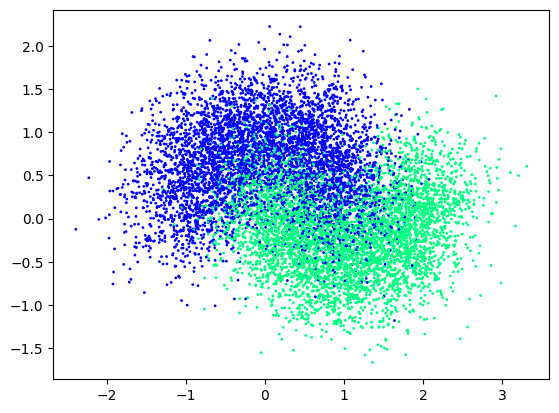

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],X[:, 1],c=y,cmap=plt.cm.winter,s=1)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7000, 2) (7000,)
(3000, 2) (3000,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'criterion': ['gini', 'entropy'],  # Two possible options for criterion
    'max_leaf_nodes': list(range(2,51))} # Different options for max_leaf_nodes

grid_search=GridSearchCV(estimator=dtc, param_grid=param_grid,scoring='accuracy', n_jobs=-1, refit=True, cv=5,verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]},
             scoring='accuracy', verbose=1)

In [ ]:
import pandas as pd
results=pd.DataFrame(grid_search.cv_results_)
print(results)
print("--------------------------------------------------------------------------")
print(results[['param_criterion','param_max_leaf_nodes','mean_test_score']])

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.017787      0.003676         0.005211        0.003272   
1        0.018783      0.002748         0.003962        0.002754   
2        0.020222      0.003377         0.003061        0.002430   
3        0.023847      0.005866         0.004525        0.003227   
4        0.024393      0.005795         0.001907        0.000108   
..            ...           ...              ...             ...   
93       0.044169      0.008095         0.002679        0.000923   
94       0.039435      0.008843         0.004197        0.001508   
95       0.041195      0.005549         0.002815        0.000802   
96       0.041333      0.004431         0.003191        0.001123   
97       0.041004      0.008957         0.002148        0.000117   

   param_criterion  param_max_leaf_nodes  \
0             gini                     2   
1             gini                     3   
2             gini                     4   
3      

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_leaf_nodes': 48}
0.8601428571428571


In [ ]:
grid_search.best_estimator_
best_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
best_criterion = grid_search.best_params_['criterion']
print(best_leaf_nodes)
print(best_criterion)

48
entropy


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion=best_criterion,max_leaf_nodes=best_leaf_nodes)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=48)

In [ ]:
y_pred = dtc.predict(X_test)
y_pred2 = dtc.predict(X_train)
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_pred2)
print("Test-set accuracy:",test_accuracy)
print("Train_set accuracy:",train_accuracy)

Test-set accuracy: 0.855
Train_set accuracy: 0.8768571428571429


In [ ]:
index=dtc.apply(X_test)
print(index)

[46 39 15 ... 29 46 44]


Confusion Matrix on the test set:
[[1319  220]
 [ 215 1246]]


Text(0.5, 427.9555555555555, 'Predicted label')

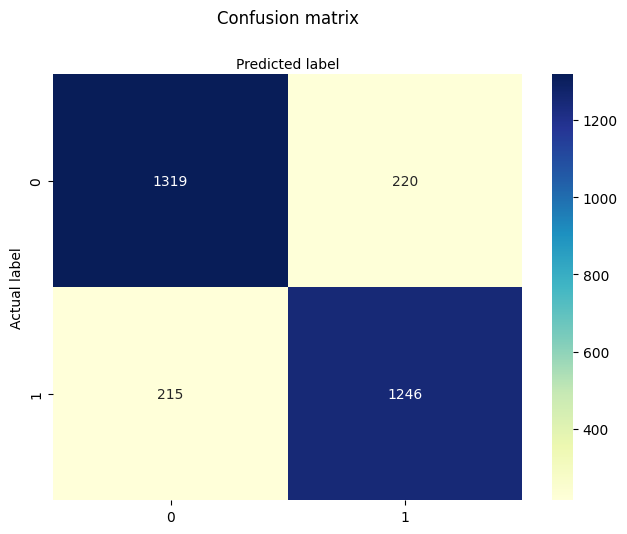

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix on the test set:")
print(conf_matrix)

C = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Confusion Matrix on the train set:
[[3062  399]
 [ 463 3076]]


Text(0.5, 427.9555555555555, 'Predicted label')

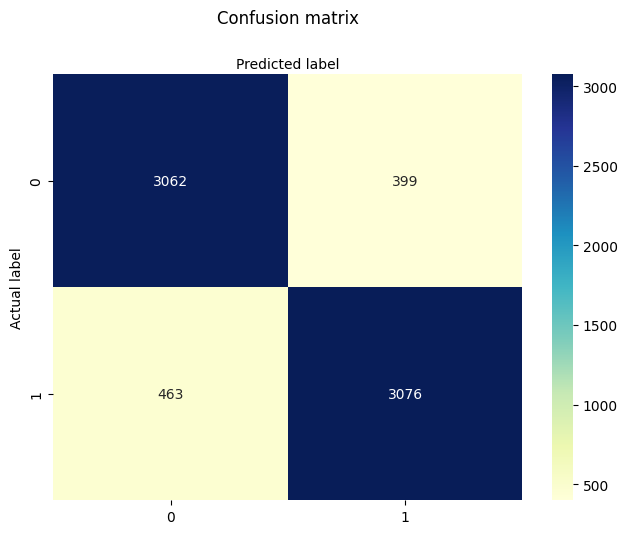

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np

conf_matrix = confusion_matrix(y_train, y_pred2)
print("Confusion Matrix on the train set:")
print(conf_matrix)

C = confusion_matrix(y_train,y_pred2)

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')